In [37]:
import pandas as pd
import sklearn.metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

from tqdm.auto import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split

In [2]:
# face_path = 'stats/vid-face-preds-211022-1639.csv'
# face_path = 'stats/vid-face-preds-211022-1713.csv'
face_path = '../stats/vid-face-preds-211106-0909.csv'
face_df = pd.read_csv(face_path)
face_df['face_pred'] = face_df['median']
display(face_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,median,1st_quartile_pred,3rd_quartile_pred,group_pred,face_pred
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.999568,0.995638,0.999927,0.999686,0.999568
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.997323,0.962807,0.999860,0.998493,0.997323
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.999326,0.997067,0.999958,0.999703,0.999326
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.998871,0.997290,0.999831,0.999158,0.998871
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.997788,0.975152,0.999854,0.999870,0.997788
...,...,...,...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.237312,0.027877,0.389423,0.351240,0.237312
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.040162,0.008745,0.163303,0.135718,0.040162
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.507716,0.392383,0.627312,0.589261,0.507716
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.005328,0.000529,0.023253,0.009802,0.005328


In [3]:
audio_path = '../FakeVoiceTorch/csvs/aisg-preds-211013-1810.csv'
audio_df = pd.read_csv(audio_path)
audio_df['audio_pred'] = audio_df['median_pred']
display(audio_df)

,filename,label,trained_upon,median_pred,mean_pred,3rd_quartile_pred,1st_quartile_pred,group_pred,audio_pred
0,9a22372d22a52397.mp4,1,0,0.942156,0.942156,0.952945,0.939705,0.945661,0.942156
1,9bc4f1306bb8e2cd.mp4,1,0,0.954891,0.954891,0.962717,0.951176,0.958116,0.954891
2,88fe2a902a9d8cc7.mp4,1,0,0.953008,0.953008,0.961259,0.949398,0.957011,0.953008
3,1f3cbda142d0944a.mp4,1,0,0.955451,0.955451,0.963568,0.950211,0.958797,0.955451
4,63bed62257daccaf.mp4,1,0,0.955592,0.955592,0.963512,0.952683,0.958823,0.955592
...,...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,1,0.003744,0.003744,0.006697,0.002873,0.004893,0.003744
6939,b7b7b7f6db7f6e2e.mp4,0,1,0.104911,0.104911,0.145143,0.091448,0.118912,0.104911
6940,c3fc75289ae3b41e.mp4,0,1,0.016028,0.016028,0.090767,0.002062,0.058182,0.016028
6941,519e97d4c90aaa1c.mp4,0,1,0.690651,0.690651,0.719363,0.662181,0.695907,0.690651


In [4]:
combine_df = pd.merge(
    left=audio_df[['filename', 'audio_pred']],
    right=face_df[['filename', 'face_pred', 'label', 'audio_fake', 'face_fake', 'swap_fake']], 
    left_on='filename', right_on='filename'
)
display(combine_df)

,filename,audio_pred,face_pred,label,audio_fake,face_fake,swap_fake
0,9a22372d22a52397.mp4,0.942156,0.999568,1,1.0,1.0,0
1,9bc4f1306bb8e2cd.mp4,0.954891,0.997323,1,1.0,1.0,0
2,88fe2a902a9d8cc7.mp4,0.953008,0.999326,1,1.0,1.0,0
3,1f3cbda142d0944a.mp4,0.955451,0.998871,1,1.0,1.0,0
4,63bed62257daccaf.mp4,0.955592,0.997788,1,1.0,1.0,0
...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0.003744,0.237312,0,0.0,0.0,0
6939,b7b7b7f6db7f6e2e.mp4,0.104911,0.040162,0,0.0,0.0,0
6940,c3fc75289ae3b41e.mp4,0.016028,0.507716,0,0.0,0.0,0
6941,519e97d4c90aaa1c.mp4,0.690651,0.005328,0,0.0,0.0,0


In [19]:
def plot_roc(labels, preds, title):
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, preds)
    auc = sklearn.metrics.roc_auc_score(labels, preds)

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.05, 1.05])
    plt.title(f"{title} [AUC = {auc}]")
    plt.plot(fpr, tpr)

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.title(f'{title} [sorted predictions]')
    plt.plot(sorted(preds))

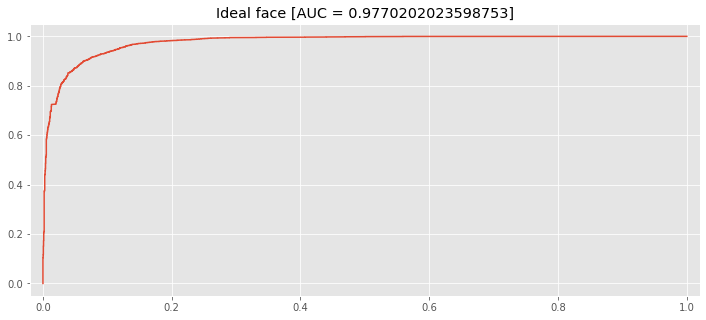

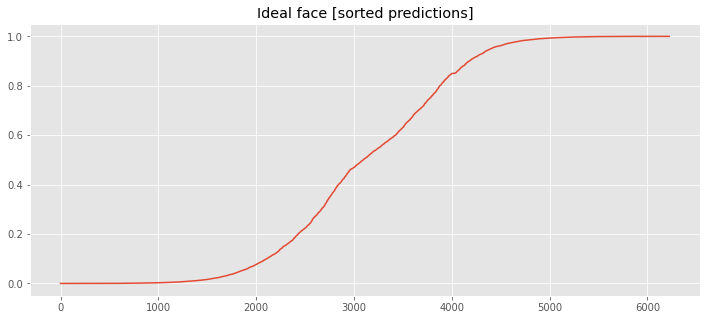

In [20]:
sub_df = combine_df[combine_df['swap_fake'] == 0]
preds = sub_df['face_pred'].to_numpy()
labels = sub_df['face_fake'].to_numpy().astype(int)
plot_roc(labels, preds, title='Ideal face')

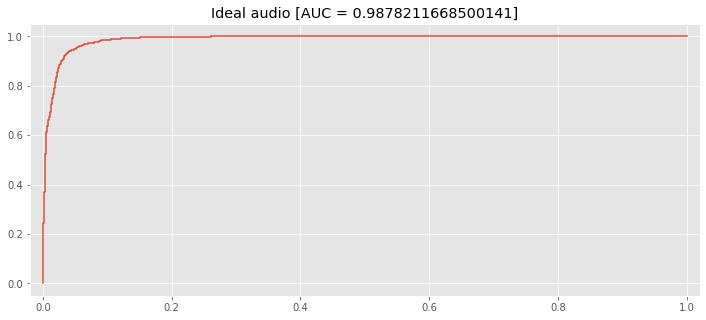

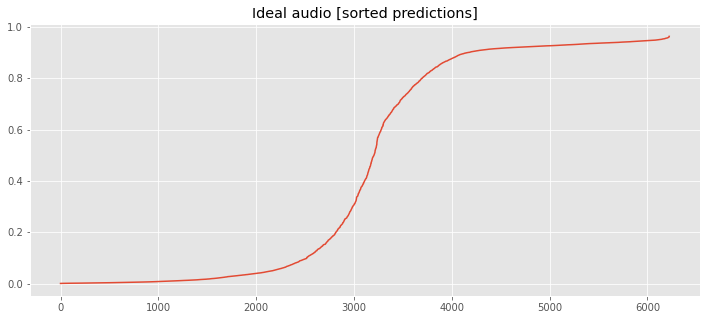

In [21]:
sub_df = combine_df[combine_df['swap_fake'] == 0]
preds = sub_df['audio_pred'].to_numpy()
labels = sub_df['audio_fake'].to_numpy().astype(int)
plot_roc(labels, preds, title='Ideal audio')

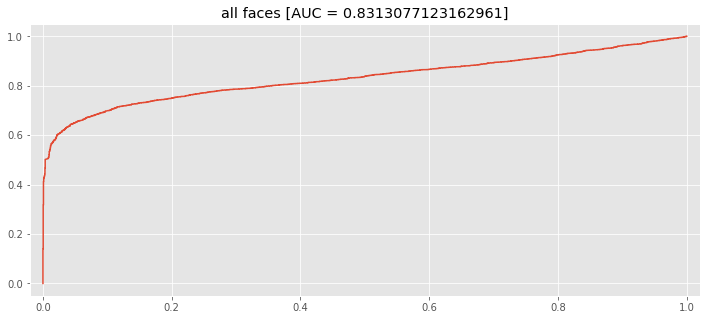

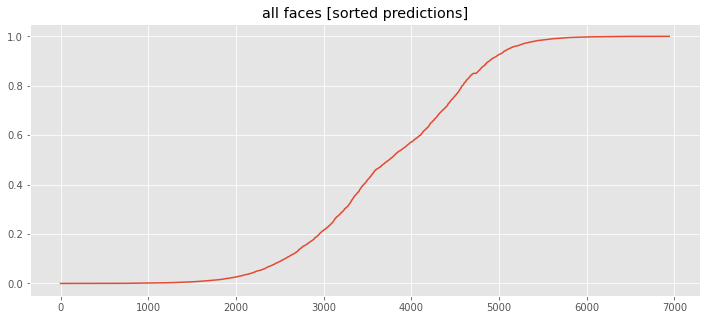

In [22]:
sub_df = combine_df
preds = sub_df['face_pred'].to_numpy()
labels = sub_df['label'].to_numpy().astype(int)
plot_roc(labels, preds, title='all faces')

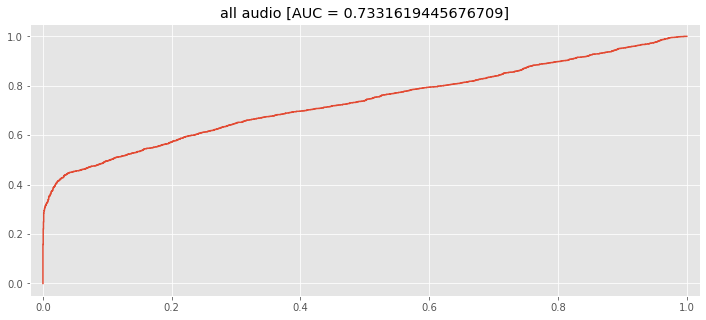

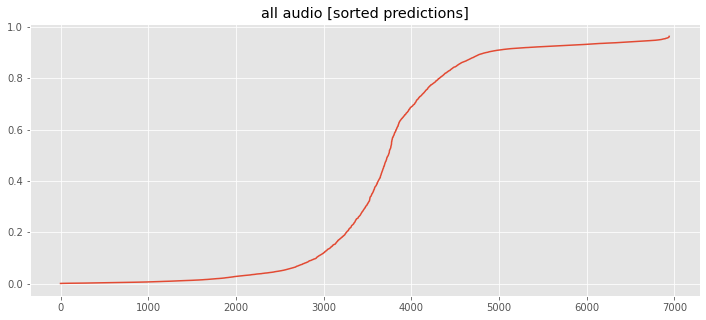

In [23]:
sub_df = combine_df
preds = sub_df['audio_pred'].to_numpy()
labels = sub_df['label'].to_numpy().astype(int)
plot_roc(labels, preds, title='all audio')

[0.99956757 0.99732262 0.99932575 ... 0.50771582 0.69065118 0.00323407]


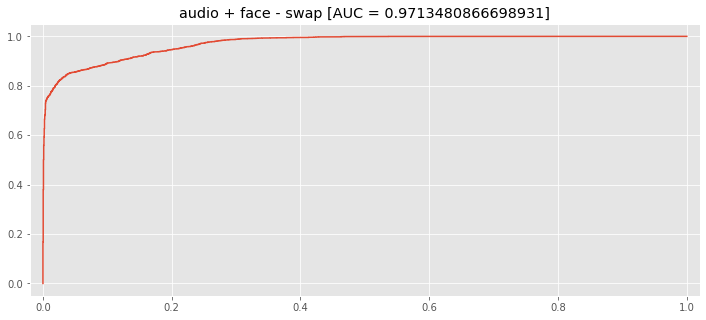

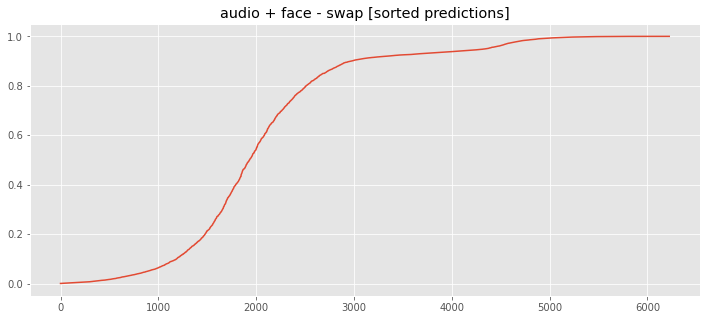

In [24]:
sub_df = combine_df[combine_df['swap_fake'] == 0]
audio_preds = sub_df['audio_pred'].to_numpy()
face_preds = sub_df['face_pred'].to_numpy()
preds = np.max([audio_preds, face_preds], axis=0)
print(preds)

labels = sub_df['label'].to_numpy().astype(int)
plot_roc(labels, preds, title='audio + face - swap')

[0.99956757 0.99732262 0.99932575 ... 0.50771582 0.69065118 0.00323407]


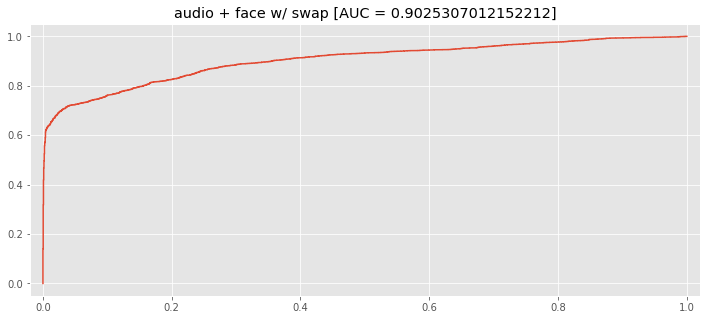

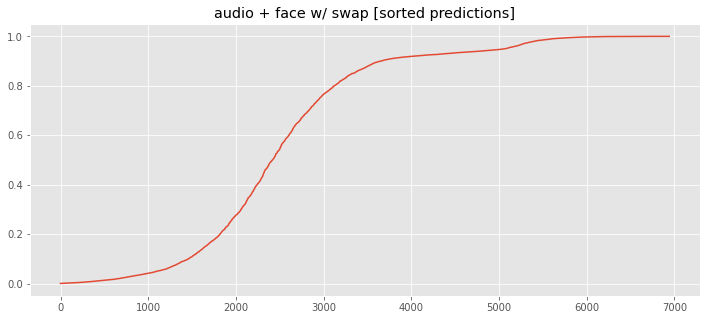

In [25]:
sub_df = combine_df.copy() # [combine_df['swap_fake'] == 0]
audio_preds = sub_df['audio_pred'].to_numpy()
face_preds = sub_df['face_pred'].to_numpy()
preds = np.max([audio_preds, face_preds], axis=0)
print(preds)

labels = sub_df['label'].to_numpy().astype(int)
plot_roc(labels, preds, title='audio + face w/ swap')

[1.14956757 1.14732262 1.14932575 ... 0.65771582 0.69065118 0.15323407]


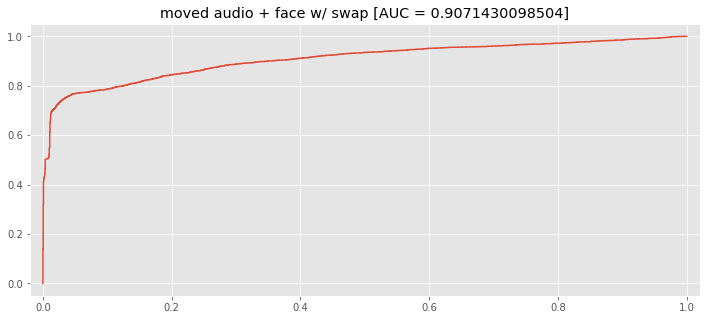

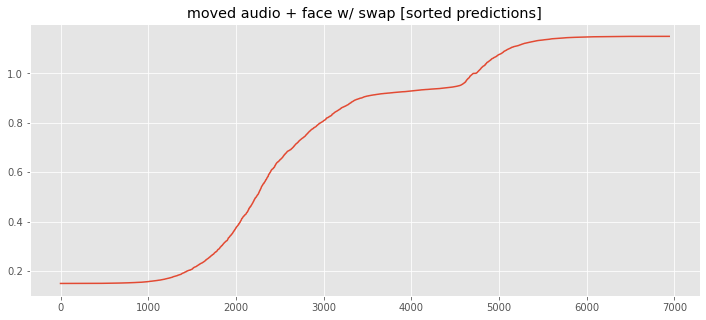

In [58]:
sub_df = combine_df.copy() # [combine_df['swap_fake'] == 0]
audio_preds = sub_df['audio_pred'].to_numpy()
face_preds = sub_df['face_pred'].to_numpy() + 0.15
preds = np.max([audio_preds, face_preds], axis=0)
print(preds)

labels = sub_df['label'].to_numpy().astype(int)
plot_roc(labels, preds, title='moved audio + face w/ swap')

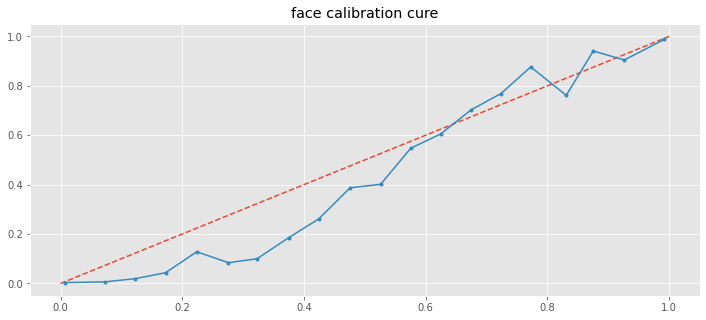

In [43]:
sub_df = combine_df.copy() # [combine_df['swap_fake'] == 0]
audio_preds = sub_df['audio_pred'].to_numpy()
face_preds = sub_df['face_pred'].to_numpy()
preds = np.max([audio_preds, face_preds], axis=0)
labels = sub_df['face_fake'].to_numpy().astype(int)

fop, mpv = calibration_curve(labels, face_preds, n_bins=20)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.title('face calibration cure')
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

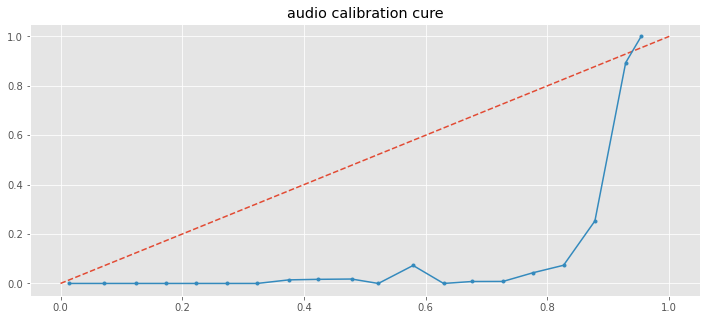

In [49]:
sub_df = combine_df.copy() # [combine_df['swap_fake'] == 0]
audio_preds = sub_df['audio_pred'].to_numpy()
face_preds = sub_df['face_pred'].to_numpy()
preds = np.max([audio_preds, face_preds], axis=0)
labels = sub_df['audio_fake'].to_numpy().astype(int)

fop, mpv = calibration_curve(labels, audio_preds, n_bins=20)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.title('audio calibration cure')
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

preds [0.03129065 0.04106403 0.99573718 ... 0.42013876 0.99508321 0.95442175]


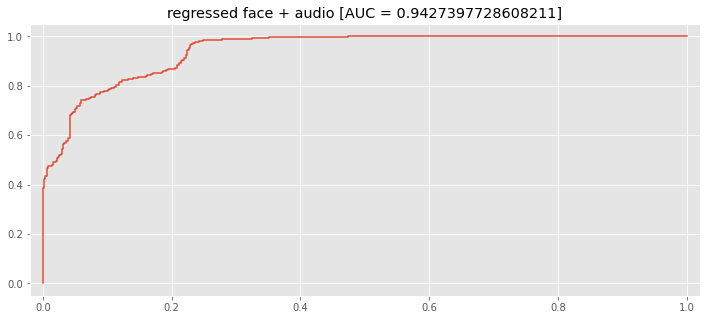

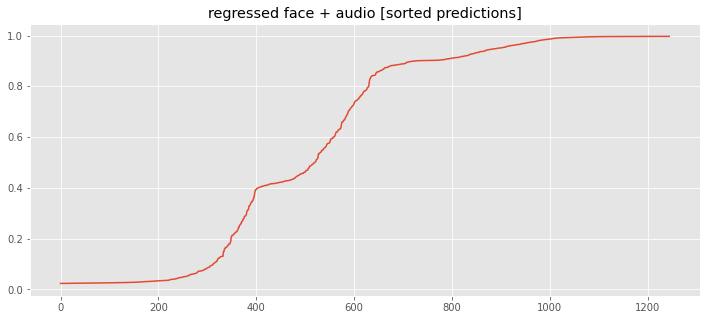

In [35]:
sub_df = combine_df[combine_df['swap_fake'] == 0]
features = sub_df[['face_pred', 'audio_pred']]
labels = sub_df['label'].to_numpy().astype(int)
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=69
)

regressor = LogisticRegression()
regressor.fit(x_train, y_train)
preds = regressor.predict_proba(x_test)[:, 1]
plot_roc(y_test, preds, title='regressed face + audio')
print('preds', preds)

[1.14956757 1.14732262 1.14932575 ... 0.65771582 0.69065118 0.15323407]


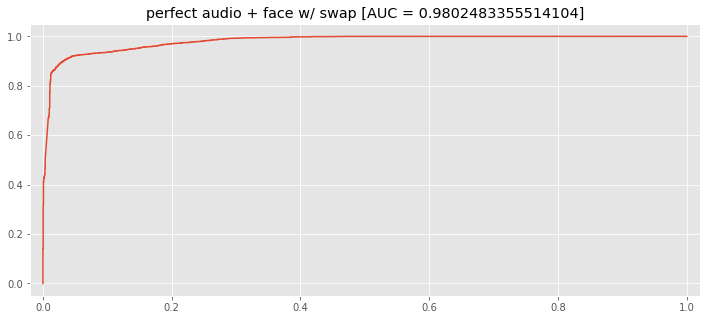

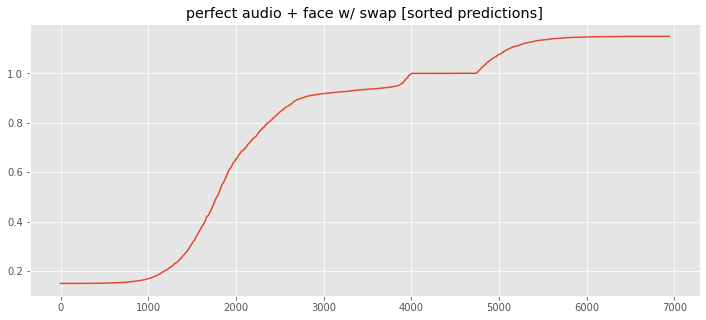

In [57]:
sub_df = combine_df.copy() # [combine_df['swap_fake'] == 0]
sync_labels = sub_df['swap_fake'].to_numpy()
audio_preds = sub_df['audio_pred'].to_numpy()
face_preds = sub_df['face_pred'].to_numpy()
preds = np.max([audio_preds, face_preds + 0.15, sync_labels], axis=0)
print(preds)

labels = sub_df['label'].to_numpy().astype(int)
plot_roc(labels, preds, title='perfect audio + face w/ swap')